In [1]:
from google.colab.patches import cv2_imshow

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-20 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


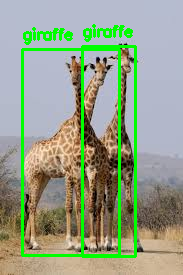

In [ ]:
import torch
import cv2
from google.colab.patches import cv2_imshow  # Import the cv2_imshow for Colab

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load object names
object_names = model.names

# Load an image
image = cv2.imread('/content/test1.jfif')
if image is None:
    print("Error: Image not found.")
    exit()

# Perform inference
results = model(image)

# Draw bounding boxes and class names around the detected objects
for detection in results.xyxy[0]:
    xmin, ymin, xmax, ymax, conf, class_index = detection[:6]

    # Convert to integers
    xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])

    class_name = object_names[int(class_index)]

    # Draw the rectangle and label
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(image, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes and class names in Colab
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
